In [6]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [7]:
dataset=pd.read_csv("EV_Dataset_Denmark.csv")

In [8]:
dataset.shape

(11088, 14)

In [9]:
df=pd.DataFrame(dataset.columns)
df

,0
0,Reg. nr.
1,Fabrikant
2,Model
3,Variant
4,Første reg. dato
5,Stelnummer
6,Status
7,Type
8,Battery Capacity (kWh)
9,EV type (BEV = 1 or PHEV =2)


In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Fabrikant']= label_encoder.fit_transform(dataset['Fabrikant'])
dataset['Model']= label_encoder.fit_transform(dataset['Model'])
dataset['Variant']= label_encoder.fit_transform(dataset['Variant'])
dataset['Reg. nr.']= label_encoder.fit_transform(dataset['Reg. nr.'])
dataset['Første reg. dato']= label_encoder.fit_transform(dataset['Første reg. dato'])
dataset['Stelnummer']= label_encoder.fit_transform(dataset['Stelnummer'])
dataset['Status']= label_encoder.fit_transform(dataset['Status'])
dataset['Type']= label_encoder.fit_transform(dataset['Type'])
dataset['Socioeconomic Behavior Index']= label_encoder.fit_transform(dataset['Socioeconomic Behavior Index'])

In [11]:
dataset.head()

,Reg. nr.,Fabrikant,Model,Variant,Første reg. dato,Stelnummer,Status,Type,Battery Capacity (kWh),EV type (BEV = 1 or PHEV =2),Avg consumption in a day (KWh),Distance driven in a day (km),Initial SOC (kWh),Socioeconomic Behavior Index
0,5929,0,7,147,1179,9305,3,0,8.8,2,3,15,7.202660,0
1,9653,0,7,147,374,9311,3,0,8.8,2,3,15,6.907677,4
2,7770,0,7,147,727,9308,3,0,8.8,2,3,15,7.185391,0
3,9386,0,7,147,54,9288,3,0,8.8,2,3,15,7.269912,2
4,10941,0,7,147,346,9306,2,0,8.8,2,3,15,7.242424,1


In [12]:
dataset.describe()

,Reg. nr.,Fabrikant,Model,Variant,Første reg. dato,Stelnummer,Status,Type,Battery Capacity (kWh),EV type (BEV = 1 or PHEV =2),Avg consumption in a day (KWh),Distance driven in a day (km),Initial SOC (kWh),Socioeconomic Behavior Index
count,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000
mean,5507.770833,16.182089,51.365801,77.421086,872.244138,5484.396284,2.963384,0.005321,42.647466,1.178030,7.903950,39.519751,34.760626,2.000180
std,3163.157867,5.890705,16.019100,48.794887,443.546247,3155.838796,0.267802,0.072755,31.537945,0.382556,7.120696,35.603480,25.713564,1.147072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,5.000000,3.924817,0.000000
25%,2762.750000,12.000000,47.000000,46.000000,510.750000,2765.750000,3.000000,0.000000,20.000000,1.000000,4.000000,20.000000,16.330434,1.000000
50%,5534.500000,18.000000,54.000000,61.000000,893.000000,5454.500000,3.000000,0.000000,24.000000,1.000000,6.000000,30.000000,19.752067,2.000000
75%,8267.250000,20.000000,56.000000,128.000000,1201.000000,8217.250000,3.000000,0.000000,85.000000,1.000000,9.000000,45.000000,68.517675,3.000000
max,10941.000000,24.000000,77.000000,160.000000,1667.000000,10947.000000,3.000000,1.000000,100.000000,2.000000,80.000000,400.000000,82.862894,4.000000


In [13]:
dataset.shape

(11088, 14)

In [14]:
dataset.isnull()

,Reg. nr.,Fabrikant,Model,Variant,Første reg. dato,Stelnummer,Status,Type,Battery Capacity (kWh),EV type (BEV = 1 or PHEV =2),Avg consumption in a day (KWh),Distance driven in a day (km),Initial SOC (kWh),Socioeconomic Behavior Index
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11084,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11085,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11086,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
dataset.dropna(subset=["Reg. nr.","Første reg. dato","Stelnummer","Status","Type","Fabrikant","Model","Variant","Battery Capacity (kWh)","EV type (BEV = 1 or PHEV =2)","Avg consumption in a day (KWh)","Distance driven in a day (km)","Initial SOC (kWh)","Socioeconomic Behavior Index"],inplace=True)

In [16]:
dataset.isnull()

,Reg. nr.,Fabrikant,Model,Variant,Første reg. dato,Stelnummer,Status,Type,Battery Capacity (kWh),EV type (BEV = 1 or PHEV =2),Avg consumption in a day (KWh),Distance driven in a day (km),Initial SOC (kWh),Socioeconomic Behavior Index
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11084,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11085,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11086,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
dataset.shape

(11088, 14)

In [18]:
dataset

,Reg. nr.,Fabrikant,Model,Variant,Første reg. dato,Stelnummer,Status,Type,Battery Capacity (kWh),EV type (BEV = 1 or PHEV =2),Avg consumption in a day (KWh),Distance driven in a day (km),Initial SOC (kWh),Socioeconomic Behavior Index
0,5929,0,7,147,1179,9305,3,0,8.8,2,3,15,7.202660,0
1,9653,0,7,147,374,9311,3,0,8.8,2,3,15,6.907677,4
2,7770,0,7,147,727,9308,3,0,8.8,2,3,15,7.185391,0
3,9386,0,7,147,54,9288,3,0,8.8,2,3,15,7.269912,2
4,10941,0,7,147,346,9306,2,0,8.8,2,3,15,7.242424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,8159,24,72,118,653,10934,3,0,11.2,2,3,15,9.167022,4
11084,7482,24,72,118,671,10936,3,0,11.2,2,4,20,8.791589,3
11085,8340,24,72,118,159,10933,3,0,11.2,2,5,25,9.145043,1
11086,6872,24,72,118,648,10935,3,0,11.2,2,6,30,9.252615,4


In [19]:
dataset

,Reg. nr.,Fabrikant,Model,Variant,Første reg. dato,Stelnummer,Status,Type,Battery Capacity (kWh),EV type (BEV = 1 or PHEV =2),Avg consumption in a day (KWh),Distance driven in a day (km),Initial SOC (kWh),Socioeconomic Behavior Index
0,5929,0,7,147,1179,9305,3,0,8.8,2,3,15,7.202660,0
1,9653,0,7,147,374,9311,3,0,8.8,2,3,15,6.907677,4
2,7770,0,7,147,727,9308,3,0,8.8,2,3,15,7.185391,0
3,9386,0,7,147,54,9288,3,0,8.8,2,3,15,7.269912,2
4,10941,0,7,147,346,9306,2,0,8.8,2,3,15,7.242424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,8159,24,72,118,653,10934,3,0,11.2,2,3,15,9.167022,4
11084,7482,24,72,118,671,10936,3,0,11.2,2,4,20,8.791589,3
11085,8340,24,72,118,159,10933,3,0,11.2,2,5,25,9.145043,1
11086,6872,24,72,118,648,10935,3,0,11.2,2,6,30,9.252615,4


In [20]:
sns.pairplot(dataset)

Error in callback <function flush_figures at 0x000001E962A1CD30> (for post_execute):


KeyboardInterrupt: 

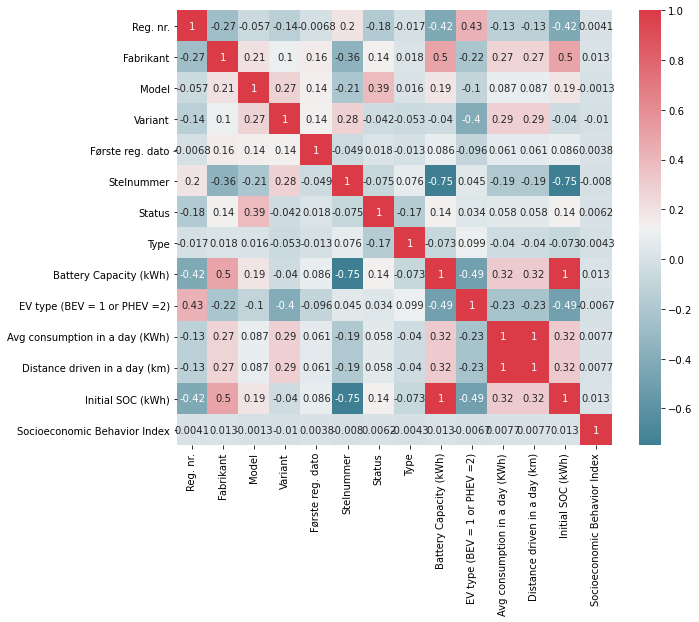

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [22]:
df=pd.DataFrame(dataset.columns)
df

,0
0,Reg. nr.
1,Fabrikant
2,Model
3,Variant
4,Første reg. dato
5,Stelnummer
6,Status
7,Type
8,Battery Capacity (kWh)
9,EV type (BEV = 1 or PHEV =2)


In [23]:
#With all parameters; Ytl:Y(total parameters with Linear regression) 't' indicatestotal  'l' indicates linear regression
Yt=dataset["Avg consumption in a day (KWh)"]
X13=dataset[['Fabrikant','Model','Variant','Battery Capacity (kWh)','EV type (BEV = 1 or PHEV =2)','Distance driven in a day (km)','Initial SOC (kWh)','Reg. nr.','Første reg. dato','Socioeconomic Behavior Index','Type','Status','Stelnummer']]

In [24]:
from sklearn.model_selection import train_test_split
X13_train, X13_test, Yt_train, Yt_test = train_test_split(X13, Yt, test_size=0.3, random_state=100)

In [25]:
#LINEAR REGRESSION with all parameters::
from sklearn.linear_model import LinearRegression
lrtl=LinearRegression()
lrtl.fit(X13_train,Yt_train)

LinearRegression()

In [26]:
lrtl.coef_
predictions_tl=lrtl.predict(X13_test)
predictions_tl

array([ 7.,  7.,  1., ...,  7., 24., 27.])

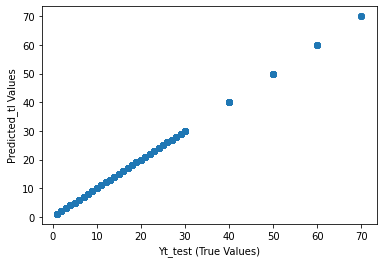

In [27]:
plt.scatter(Yt_test,predictions_tl);
plt.xlabel('Yt_test (True Values)');
plt.ylabel('Predicted_tl Values');

In [28]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE',metrics.mean_absolute_error(Yt_test,predictions_tl))
print('MSE',metrics.mean_squared_error(Yt_test,predictions_tl))
print('RMSE',np.sqrt(metrics.mean_squared_error(Yt_test,predictions_tl)))
print('R^2',metrics.explained_variance_score(Yt_test,predictions_tl))

MAE 2.0326962235449246e-13
MSE 6.24489318935414e-26
RMSE 2.4989784291494274e-13
R^2 1.0


In [29]:
cdf_tl=pd.DataFrame(lrtl.coef_,X13.columns,columns=['Coeff13'])
cdf_tl 

,Coeff13
Fabrikant,1.887764e-16
Model,-3.022678e-16
Variant,-1.030990e-17
Battery Capacity (kWh),-4.850519e-16
EV type (BEV = 1 or PHEV =2),1.372935e-14
Distance driven in a day (km),2.000000e-01
Initial SOC (kWh),1.027732e-15
Reg. nr.,-6.531643e-18
Første reg. dato,-5.675486e-16
Socioeconomic Behavior Index,-1.169144e-16


In [30]:
#With following seven parameters
Y=dataset["Avg consumption in a day (KWh)"]
X7=dataset[['Fabrikant','Model','Variant','Battery Capacity (kWh)','EV type (BEV = 1 or PHEV =2)','Distance driven in a day (km)','Initial SOC (kWh)']]

In [31]:
df=pd.DataFrame(['Fabrikant','Model','Variant','Battery Capacity (kWh)','EV type (BEV = 1 or PHEV =2)','Distance driven in a day (km)','Initial SOC (kWh)','Avg consumption in a day (KWh)'])
df

,0
0,Fabrikant
1,Model
2,Variant
3,Battery Capacity (kWh)
4,EV type (BEV = 1 or PHEV =2)
5,Distance driven in a day (km)
6,Initial SOC (kWh)
7,Avg consumption in a day (KWh)


KeyboardInterrupt: 

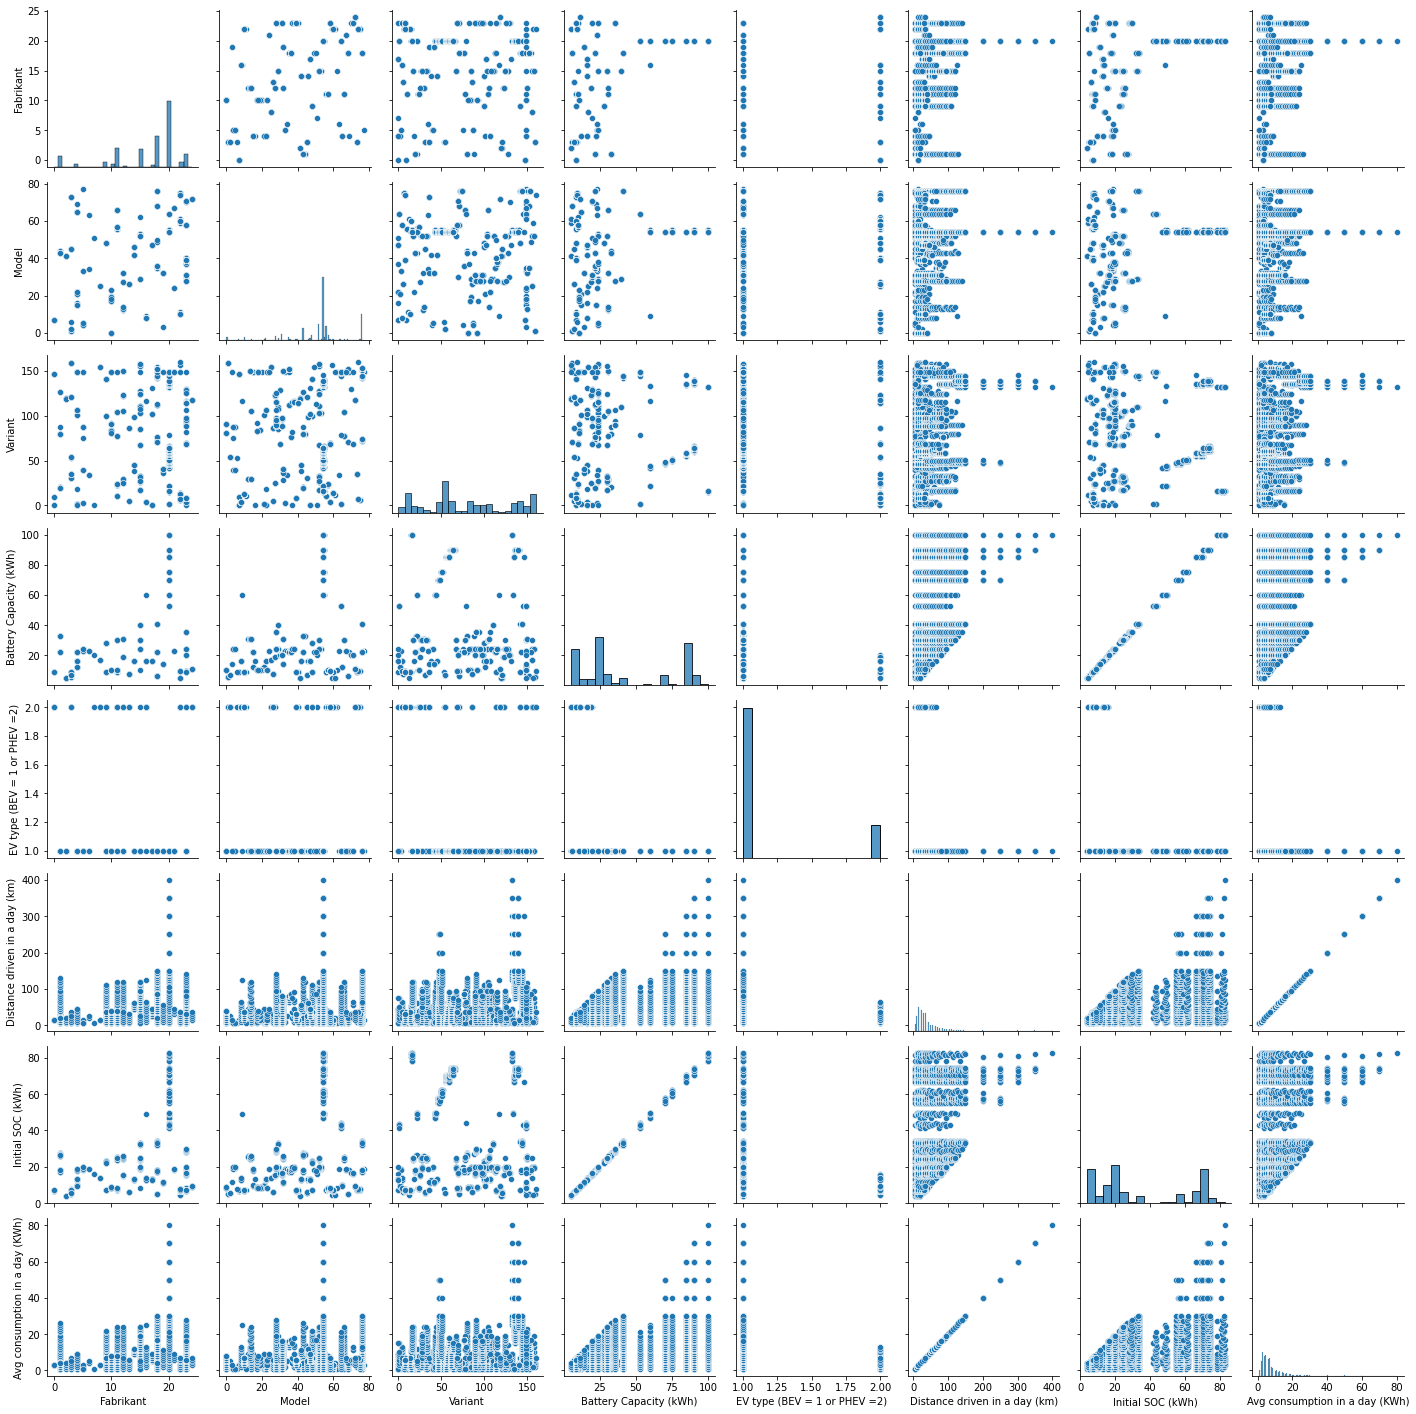

In [32]:
sns.pairplot(dataset,x_vars=['Fabrikant','Model','Variant','Battery Capacity (kWh)','EV type (BEV = 1 or PHEV =2)','Distance driven in a day (km)','Initial SOC (kWh)','Avg consumption in a day (KWh)'],y_vars=['Fabrikant','Model','Variant','Battery Capacity (kWh)','EV type (BEV = 1 or PHEV =2)','Distance driven in a day (km)','Initial SOC (kWh)','Avg consumption in a day (KWh)'],kind='scatter')

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
list= ['Fabrikant','Model','Variant','Battery Capacity (kWh)','EV type (BEV = 1 or PHEV =2)','Distance driven in a day (km)','Initial SOC (kWh)','Avg consumption in a day (KWh)']
dataframe=dataset[list]
corr=dataframe.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X7_train, X7_test, Y_train, Y_test = train_test_split(X7, Y, test_size=0.3, random_state=101)

In [ ]:
#LINEAR REGRESSION with 7 parameters::
from sklearn.linear_model import LinearRegression
lr7=LinearRegression()
lr7.fit(X7_train,Y_train)

In [ ]:
lr7.coef_

In [ ]:
predictions_7=lr7.predict(X7_test)

In [ ]:
plt.scatter(Y_test,predictions_7);
plt.xlabel('Y_test (True Values)');
plt.ylabel('Predicted Values');

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE',metrics.mean_absolute_error(Y_test,predictions_7))
print('MSE',metrics.mean_squared_error(Y_test,predictions_7))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions_7)))
print('R^2',metrics.explained_variance_score(Y_test,predictions_7))

In [ ]:
predictions_7

In [ ]:
cdf=pd.DataFrame(lr7.coef_,X7.columns,columns=['Coeff'])
cdf                 

In [ ]:
#With Only one parameter i.e., Distrance driven in a day (km)
X1=dataset[['Distance driven in a day (km)']]
Y1=dataset['Avg consumption in a day (KWh)']

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(X1_train,Y1_train)

In [ ]:
lr1.coef_

In [ ]:
predictions1=lr1.predict(X1_test)
predictions1

In [ ]:
plt.scatter(Y1_test,predictions1);
plt.xlabel('Avg consumption in a day (KWh) (True Values)');
plt.ylabel('Avg consumption in a day (KWh) Predicted1 Values');

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE1',metrics.mean_absolute_error(Y1_test,predictions1))
print('MSE1',metrics.mean_squared_error(Y1_test,predictions1))
print('RMSE1',np.sqrt(metrics.mean_squared_error(Y1_test,predictions1)))
print('R^2(1)',metrics.explained_variance_score(Y1_test,predictions1))

In [ ]:
cdf1=pd.DataFrame(lr1.coef_,X1.columns,columns=['Coeff1'])
cdf1  

In [ ]:
#SUPPORT VECTOR MACHINE(REGRESSION) USING all PARAMETERS:: 
from sklearn.svm import SVR
svr_model_t = SVR()
svr_model_t.fit(X13_train, Yt_train)
svr_predictions_t=svr_model_t.predict(X13_test)
plt.scatter(Yt_test,svr_predictions_t);
plt.xlabel('Yt_test (SVR_True Values)');
plt.ylabel('SVR_Predicted Values');

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE',metrics.mean_absolute_error(Yt_test,svr_predictions_t))
print('MSE',metrics.mean_squared_error(Yt_test,svr_predictions_t))
print('RMSE',np.sqrt(metrics.mean_squared_error(Yt_test,svr_predictions_t)))
print('R^2',metrics.explained_variance_score(Yt_test,svr_predictions_t))

In [ ]:
#SUPPORT VECTOR MACHINE(REGRESSION) with 7 parameters::
from sklearn.svm import SVR
svr_model_7 = SVR()
svr_model_7.fit(X7_train, Y_train)
svr_predictions_7=svr_model.predict(X7_test)
plt.scatter(Y_test,svr_predictions_7);
plt.xlabel('Y_test (SVR_True Values)');
plt.ylabel('SVR_Predicted Values');

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE',metrics.mean_absolute_error(Y_test,svr_predictions_7))
print('MSE',metrics.mean_squared_error(Y_test,svr_predictions_7))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,svr_predictions_7)))
print('R^2',metrics.explained_variance_score(Y_test,svr_predictions_7))

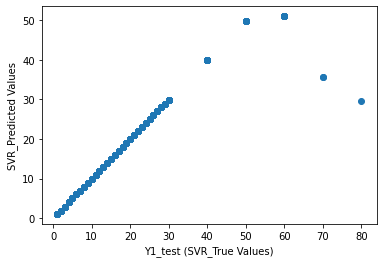

In [369]:
#SUPPORT VECTOR MACHINE(REGRESSION) USING ONE PARAMETER::
from sklearn.svm import SVR
svr_model_1 = SVR()
svr_model_1.fit(X1_train, Y1_train)
svr_predictions_1=svr_model_1.predict(X1_test)
plt.scatter(Y1_test,svr_predictions_1);
plt.xlabel('Y1_test (SVR_True Values)');
plt.ylabel('SVR_Predicted Values');

In [370]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE',metrics.mean_absolute_error(Y1_test,svr_predictions_1))
print('MSE',metrics.mean_squared_error(Y1_test,svr_predictions_1))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y1_test,svr_predictions_1)))
print('R^2',metrics.explained_variance_score(Y1_test,svr_predictions_1))

MAE 0.12750042345992108
MSE 1.6747065739963674
RMSE 1.294104545234413
R^2 0.9665509066890318


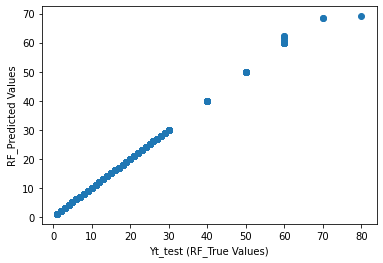

In [371]:
#Random Forest Algorithm 't' indicates total::
from sklearn.ensemble import RandomForestRegressor
rf_model_t = RandomForestRegressor()
rf_model_t.fit(X13_train, Yt_train)
rf_predictions_t=rf_model_t.predict(X13_test)
plt.scatter(Yt_test,rf_predictions_t);
plt.xlabel('Yt_test (RF_True Values)');
plt.ylabel('RF_Predicted Values');

In [372]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE',metrics.mean_absolute_error(Yt_test,rf_predictions_t))
print('MSE',metrics.mean_squared_error(Yt_test,rf_predictions_t))
print('RMSE',np.sqrt(metrics.mean_squared_error(Yt_test,rf_predictions_t)))
print('R^2',metrics.explained_variance_score(Yt_test,rf_predictions_t))

MAE 0.006556390977443606
MSE 0.04189473684210528
RMSE 0.2046820383963998
R^2 0.9992432385402982


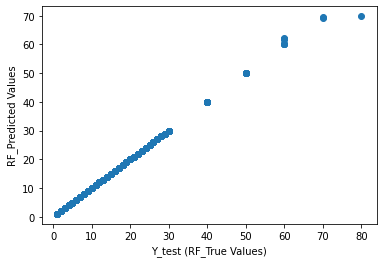

In [374]:
#Random Forest Algorithm with 7 parameters::
from sklearn.ensemble import RandomForestRegressor
rf_model_7 = RandomForestRegressor()
rf_model_7.fit(X7_train, Y_train)
rf_predictions_7=rf_model_7.predict(X7_test)
plt.scatter(Y_test,rf_predictions_7);
plt.xlabel('Y_test (RF_True Values)');
plt.ylabel('RF_Predicted Values');

In [375]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE',metrics.mean_absolute_error(Y_test,rf_predictions_7))
print('MSE',metrics.mean_squared_error(Y_test,rf_predictions_7))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,rf_predictions_7)))
print('R^2',metrics.explained_variance_score(Y_test,rf_predictions_7))

MAE 0.0058045112781954875
MSE 0.036255639097744374
RMSE 0.190409136066903
R^2 0.9992749482243354


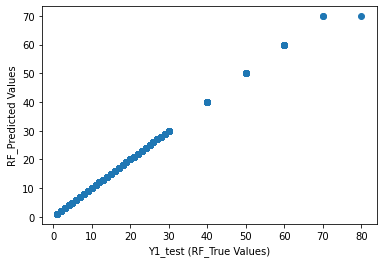

In [376]:
#Random Forest Algorithm with one parameter::
from sklearn.ensemble import RandomForestRegressor
rf_model_1 = RandomForestRegressor()
rf_model_1.fit(X1_train, Y1_train)
rf_predictions_1=rf_model_1.predict(X1_test)
plt.scatter(Y1_test,rf_predictions_1);
plt.xlabel('Y1_test (RF_True Values)');
plt.ylabel('RF_Predicted Values');

In [377]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE',metrics.mean_absolute_error(Y1_test,rf_predictions_1))
print('MSE',metrics.mean_squared_error(Y1_test,rf_predictions_1))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y1_test,rf_predictions_1)))
print('R^2',metrics.explained_variance_score(Y1_test,rf_predictions_1))

MAE 0.0030977443609022507
MSE 0.030685714285714257
RMSE 0.1751733834967923
R^2 0.9993865105032144
